In [1]:
import pandas as pd
from plotly import graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import ast

In [3]:
data_all_reviews = pd.read_parquet('data_cleaned.parquet')

En este dataframe tratamos de capturar los datos que necesitamos puesto que contiene comantarios neutros, y la mayoría de nuestra información es acerca de los comentarios positivos o negativos

In [9]:
sentiment_count_fil = data_all_reviews.review_rate.value_counts()

colors = {'positive': 'green', 'negative': 'red'}
fig = go.Figure(
    data= [go.Bar(y=sentiment_count_fil.values, x=sentiment_count_fil.index, marker=dict(color=[colors[s] for s in sentiment_count_fil.index]))],
)
fig.update_layout(title='Gráfico de barra para el conteo de los comentarios positivos y negativos',
                  width=700, 
                  height=400,
                xaxis=dict(title='Sentiment', linewidth=2), 
                yaxis=dict(title='Count',  linewidth=2),)

fig.show()

Tratamos de observar si hay palabras más frecuentes en un tipo de crítica que en el otro

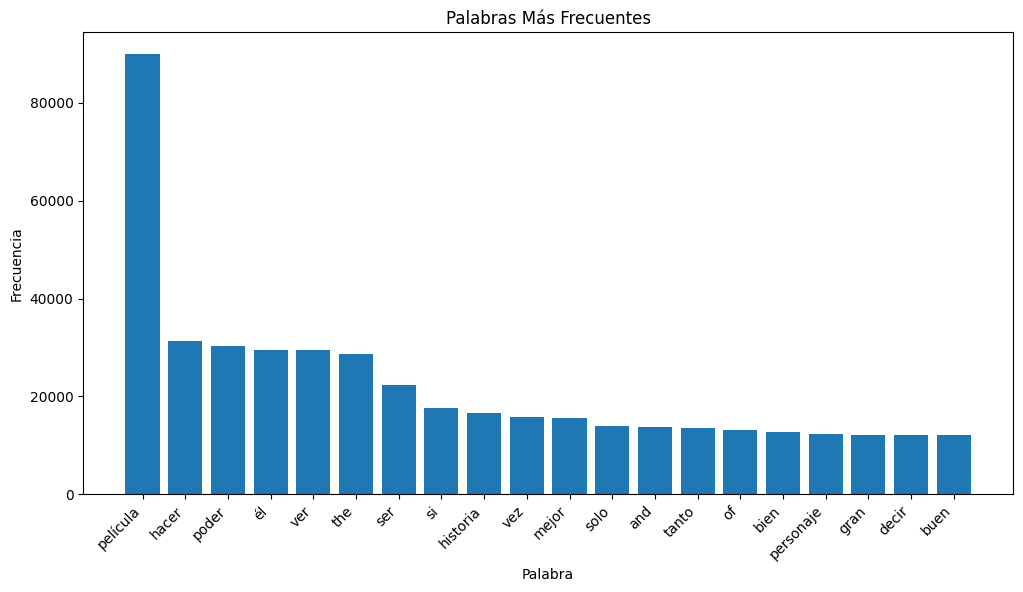

In [10]:

vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data_all_reviews.query('review_rate=="positive"')['review_text'].map(lambda p: ' '.join(p))).toarray()
palabras_frecuentes = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
palabras_frecuentes_suma = palabras_frecuentes.sum(axis=0)

plt.figure(figsize=(12, 6))
plt.bar(palabras_frecuentes_suma.sort_values(ascending=False).head(20).index, palabras_frecuentes_suma.sort_values(ascending=False).head(20).values)
plt.title('Palabras Más Frecuentes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


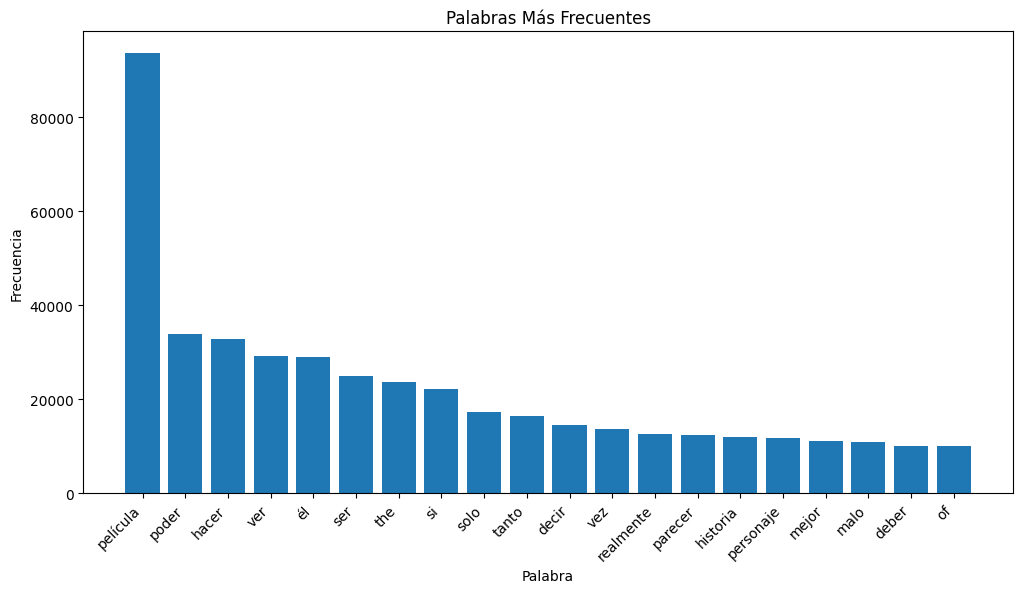

In [11]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data_all_reviews.query('review_rate=="negative"')['review_text'].map(lambda p: ' '.join(p))).toarray()
palabras_frecuentes = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
palabras_frecuentes_suma = palabras_frecuentes.sum(axis=0)

plt.figure(figsize=(12, 6))
plt.bar(palabras_frecuentes_suma.sort_values(ascending=False).head(20).index, palabras_frecuentes_suma.sort_values(ascending=False).head(20).values)
plt.title('Palabras Más Frecuentes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

Visualización de la distribución de la longitud de las críticas

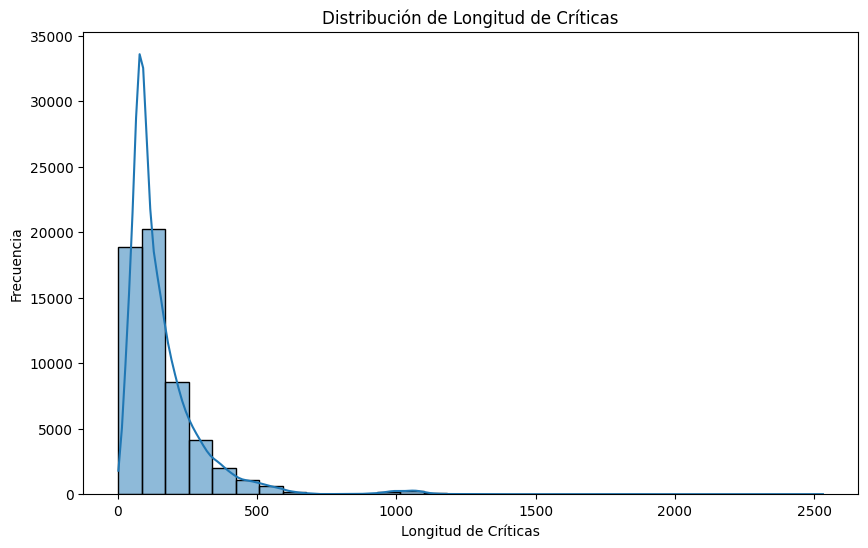

In [12]:
# Visualización de la distribución de la longitud de las críticas
data_all_reviews['review_length'] = data_all_reviews['review_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data_all_reviews['review_length'], bins=30, kde=True)
plt.title('Distribución de Longitud de Críticas')
plt.xlabel('Longitud de Críticas')
plt.ylabel('Frecuencia')
plt.show()


In [13]:
# Mostrar las primeras filas del dataframe
print(data_all_reviews.head())

# Obtener información general del dataframe
print(data_all_reviews.info())

# Estadísticas descriptivas de datos numéricos
print(data_all_reviews.describe())

                                         review_text review_rate  \
0  [mayor, virtud, película, existencia.el, hecho...    negative   
1  [experto, cinéfilo, ,, poco, vez, tanto, juego...    negative   
2  [si, incondicional, humor, estilo, tele, 5.si,...    negative   
3  [saber, pasar, ,, si, gente, dejar, llevar, mo...    negative   
4  [`, `, amanecer, ,, quedo, solo, ,, sentir, fo...    negative   

   review_length  
0            509  
1            133  
2             74  
3            208  
4            193  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56367 entries, 0 to 56366
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_text    56367 non-null  object
 1   review_rate    56367 non-null  object
 2   review_length  56367 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
None
       review_length
count   56367.000000
mean      158.945873
std       142.820178
min         2.0